In [2]:
import platform
from matplotlib import font_manager, rc

In [3]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [20]:
import os
import FinanceDataReader as fdr
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('20210104_20211119_data_interpolate.csv')
df.head()

,Date,exchange_rate,kospi,kosdaq,kospi100,dow,nasdaq,sp500,미국채10년-2년,BTC,Gold,Oil,US10Y,US2Y
0,2021-01-04,1086.48,2944.45,977.62,3052.74,30223.89,12698.4,3700.65,0.8009,36499000.0,37.10,32.38,0.918,0.1171
1,2021-01-05,1086.42,2990.57,985.76,3099.42,30391.60,12819.0,3726.86,0.8320,37962000.0,37.18,33.94,0.955,0.1230
2,2021-01-06,1087.93,2968.21,981.39,3070.05,30829.40,12740.8,3748.14,0.9002,40731000.0,36.60,34.11,1.039,0.1388
3,2021-01-07,1094.28,3031.68,988.86,3139.48,31041.13,13067.5,3803.79,0.9402,44575000.0,36.48,34.53,1.081,0.1408
4,2021-01-08,1092.93,3152.18,987.79,3293.96,31097.97,13202.0,3824.68,0.9821,47241000.0,35.26,35.43,1.119,0.1369


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           230 non-null    object 
 1   exchange_rate  230 non-null    float64
 2   kospi          230 non-null    float64
 3   kosdaq         230 non-null    float64
 4   kospi100       230 non-null    float64
 5   dow            230 non-null    float64
 6   nasdaq         230 non-null    float64
 7   sp500          230 non-null    float64
 8   미국채10년-2년      230 non-null    float64
 9   BTC            230 non-null    float64
 10  Gold           230 non-null    float64
 11  Oil            230 non-null    float64
 12  US10Y          230 non-null    float64
 13  US2Y           230 non-null    float64
dtypes: float64(13), object(1)
memory usage: 25.3+ KB


In [7]:
# plt.figure(figsize=(12,10))
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

### 종목 정보 불러오기

In [9]:
path = '../data'
list_name = 'Stock_List.csv'
stock_list = pd.read_csv(os.path.join(path,list_name))
stock_list.head()

,종목명,종목코드,상장시장
0,삼성전자,5930,KOSPI
1,SK하이닉스,660,KOSPI
2,NAVER,35420,KOSPI
3,카카오,35720,KOSPI
4,삼성바이오로직스,207940,KOSPI


In [10]:
# 종목 코드 6자리로 맞추기
stock_list['종목코드'] = stock_list["종목코드"].astype(str).str.zfill(6)
stock_list

,종목명,종목코드,상장시장
0,삼성전자,005930,KOSPI
1,SK하이닉스,000660,KOSPI
2,NAVER,035420,KOSPI
3,카카오,035720,KOSPI
4,삼성바이오로직스,207940,KOSPI
...,...,...,...
365,맘스터치,220630,KOSDAQ
366,다날,064260,KOSDAQ
367,제이시스메디칼,287410,KOSDAQ
368,크리스에프앤씨,110790,KOSDAQ


In [11]:
start_date = '20210104'
end_date = '20211119'

In [12]:
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])

In [13]:
# 삼성전자 테스트
code='005930'
data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
data = pd.merge(Business_days, data, how = 'outer')
data.Close = data.Close.ffill()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    230 non-null    datetime64[ns]
 1   Close   230 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.4 KB


In [15]:
data['Date'] = data['Date'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    230 non-null    object 
 1   Close   230 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


In [16]:
data = pd.merge(data, df, on='Date')
data.head()

,Date,Close,exchange_rate,kospi,kosdaq,kospi100,dow,nasdaq,sp500,미국채10년-2년,BTC,Gold,Oil,US10Y,US2Y
0,2021-01-04,83000.0,1086.48,2944.45,977.62,3052.74,30223.89,12698.4,3700.65,0.8009,36499000.0,37.10,32.38,0.918,0.1171
1,2021-01-05,83900.0,1086.42,2990.57,985.76,3099.42,30391.60,12819.0,3726.86,0.8320,37962000.0,37.18,33.94,0.955,0.1230
2,2021-01-06,82200.0,1087.93,2968.21,981.39,3070.05,30829.40,12740.8,3748.14,0.9002,40731000.0,36.60,34.11,1.039,0.1388
3,2021-01-07,82900.0,1094.28,3031.68,988.86,3139.48,31041.13,13067.5,3803.79,0.9402,44575000.0,36.48,34.53,1.081,0.1408
4,2021-01-08,88800.0,1092.93,3152.18,987.79,3293.96,31097.97,13202.0,3824.68,0.9821,47241000.0,35.26,35.43,1.119,0.1369


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           230 non-null    object 
 1   Close          230 non-null    float64
 2   exchange_rate  230 non-null    float64
 3   kospi          230 non-null    float64
 4   kosdaq         230 non-null    float64
 5   kospi100       230 non-null    float64
 6   dow            230 non-null    float64
 7   nasdaq         230 non-null    float64
 8   sp500          230 non-null    float64
 9   미국채10년-2년      230 non-null    float64
 10  BTC            230 non-null    float64
 11  Gold           230 non-null    float64
 12  Oil            230 non-null    float64
 13  US10Y          230 non-null    float64
 14  US2Y           230 non-null    float64
dtypes: float64(14), object(1)
memory usage: 28.8+ KB


In [18]:
stock_name = stock_list.loc[stock_list['종목코드'] == code, '종목명']
stock_name

0    삼성전자
Name: 종목명, dtype: object

<AxesSubplot:title={'center':'0    삼성전자\nName: 종목명, dtype: object'}>

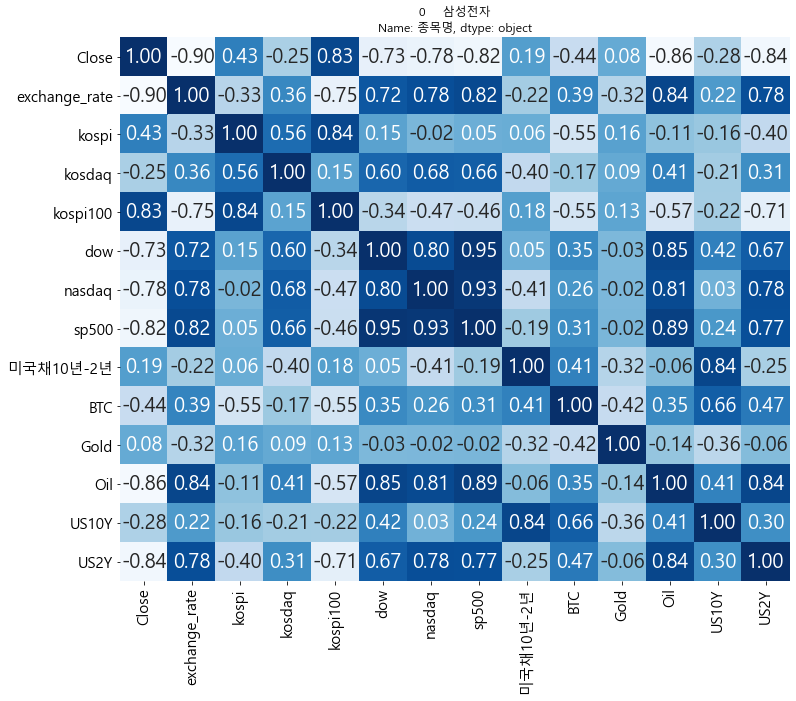

In [21]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(f'{stock_name}')
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.31it/s]


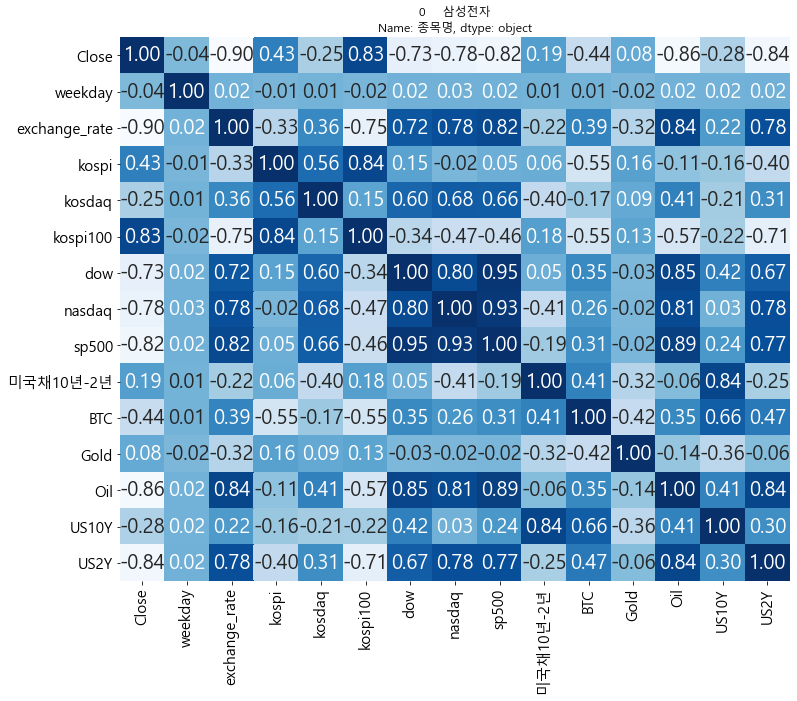

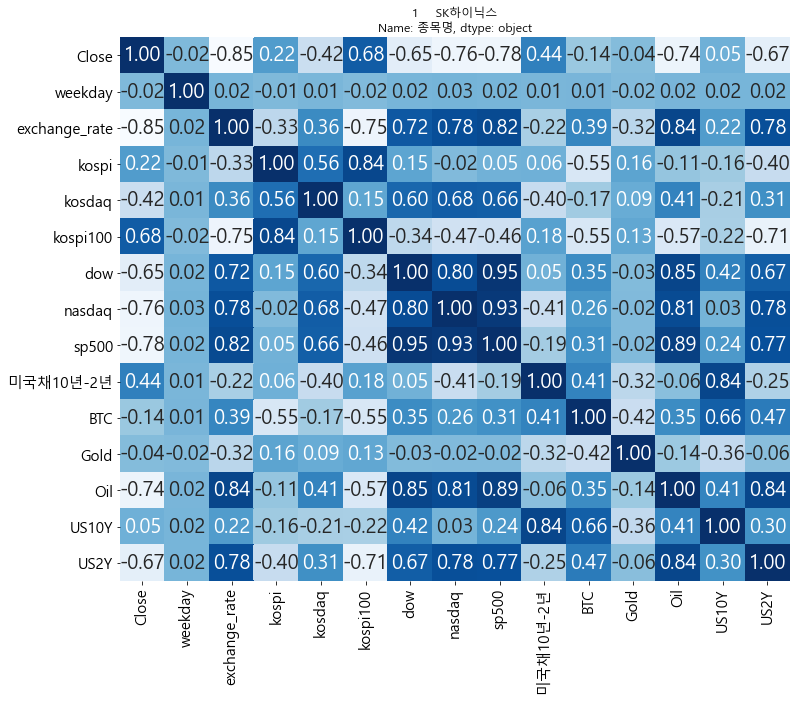

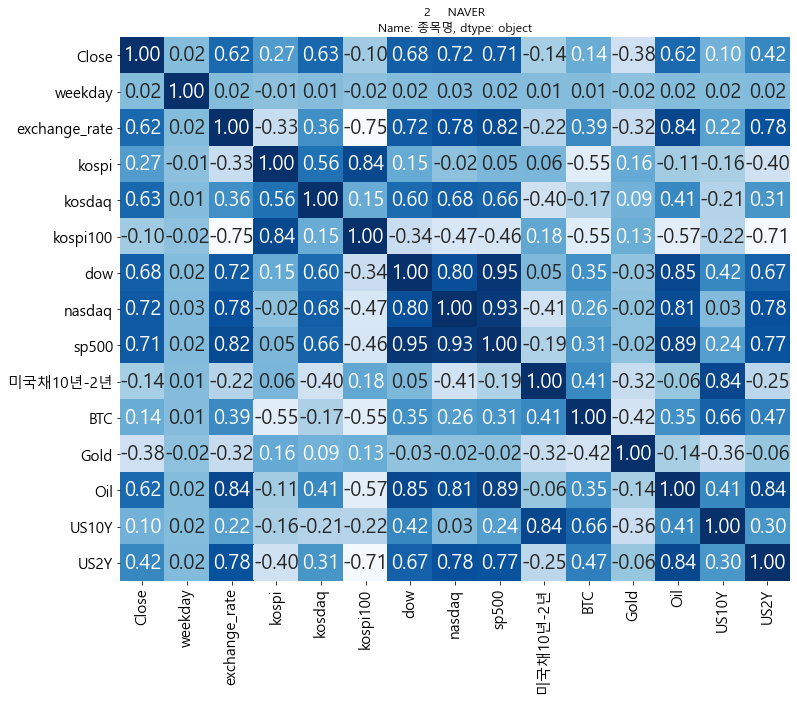

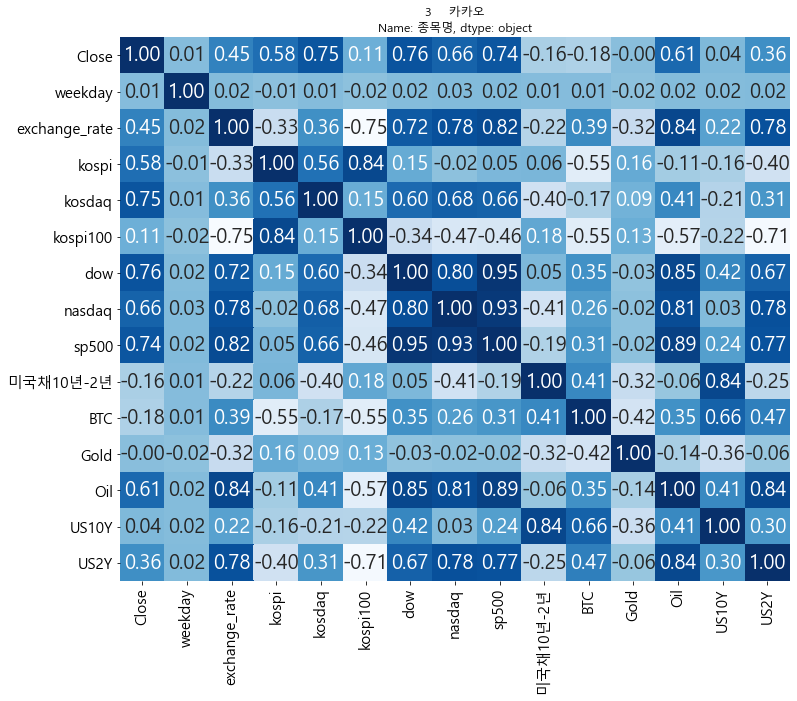

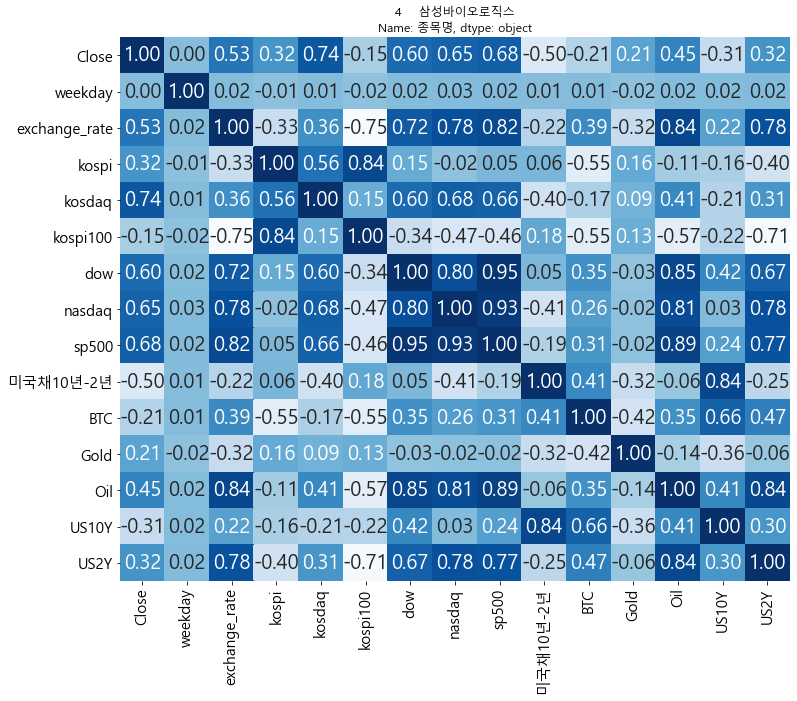

In [22]:
for code in tqdm(stock_list['종목코드'].values[:5]):
    data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
    data = pd.merge(Business_days, data, how = 'outer')
    data['weekday'] = data.Date.apply(lambda x : x.weekday())
    data['weeknum'] = data.Date.apply(lambda x : x.strftime('%V'))
    data.Close = data.Close.ffill()
    
    data['Date'] = data['Date'].astype('str')
    data = pd.merge(data, df, on='Date')
    
    stock_name = stock_list.loc[stock_list['종목코드'] == code, '종목명']
    plt.figure(figsize=(12,10))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'{stock_name}')
    sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})